In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
from sklearn.model_selection import TimeSeriesSplit
import sklearn
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
cons = pd.read_csv("df_vst_group8.csv",decimal='.')
cork = pd.read_csv("Corkstation_15072019_01022011.csv",nrows=12432,decimal='.')
donnees = pd.merge(cons,cork)

# Extraction de l'heure, des jours, jours de semaines, mois et années dans des colonnes séparées
donnees['date'] = pd.to_datetime(donnees['date'])
donnees['Heure'] = donnees['date'].dt.time.apply(lambda x: x.hour)
donnees['jour'] = donnees['date'].dt.date
donnees['weekday'] = donnees['date'].dt.weekday
donnees['month']= donnees['date'].dt.month
donnees['year'] = donnees['date'].dt.year


# Calcul de la température moyenne par jour et remplacement des valeurs de température par la température moyenne
temperature_moyenne = donnees.groupby('jour')['temp'].mean().reset_index()
temperature_moyenne = temperature_moyenne.rename(columns={'temp': 'temp_moyenne'})
donnees_merged = pd.merge(donnees, temperature_moyenne, on='jour')
donnees_merged['temp'] = donnees_merged['temp_moyenne']
donnees_merged = donnees_merged.drop([ 'temp_moyenne'], axis=1)

donnees = donnees_merged

#donnees contient les éléments de consommation et météo classés par date jusqu'au 14/12/2010
print(donnees)


                     date      mean       temp  ind  rain  ind.1  ind.2  wetb  \
0     2009-07-15 00:00:00  0.359623  14.954167    3   0.0      0      0  11.4   
1     2009-07-15 01:00:00  0.246548  14.954167    3   0.0      0      0  11.1   
2     2009-07-15 02:00:00  0.194699  14.954167    3   0.1      0      0  10.9   
3     2009-07-15 03:00:00  0.180482  14.954167    3   0.0      0      0  10.8   
4     2009-07-15 04:00:00  0.168851  14.954167    3   0.0      0      0  11.1   
...                   ...       ...        ...  ...   ...    ...    ...   ...   
12427 2010-12-14 19:00:00  1.047525   3.358333    3   0.0      0      0   1.1   
12428 2010-12-14 20:00:00  1.000873   3.358333    3   0.0      0      0   0.4   
12429 2010-12-14 21:00:00  0.948643   3.358333    3   0.0      0      1  -0.3   
12430 2010-12-14 22:00:00  0.837083   3.358333    3   0.0      1      1  -0.4   
12431 2010-12-14 23:00:00  0.699087   3.358333    3   0.0      0      1  -0.2   

       dewpt  vappr  ...   

In [87]:


# Drop rows with missing values
donnees.dropna(inplace=True)

# Create feature matrix and target vector
X = np.array(donnees[['Heure', 'temp']])

y = donnees['mean']
print(X[0:3])
# Split data into training and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

[[ 0.         14.95416667]
 [ 1.         14.95416667]
 [ 2.         14.95416667]]


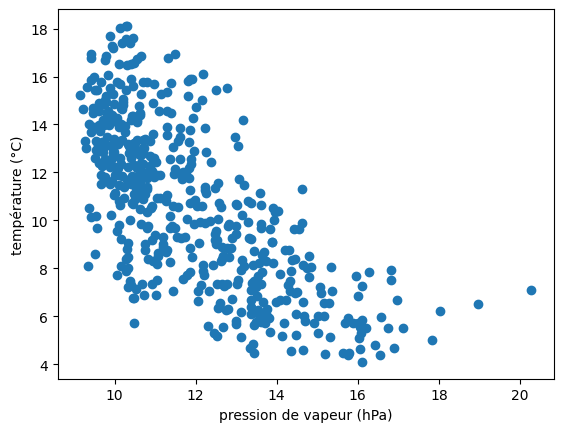

In [90]:

daily_group = donnees.resample('D', on='date')
daily_data = daily_group.sum()
daily_data['vappr'] = daily_data['vappr']/24
daily_data['temp'] = daily_data['temp']/24

plt.scatter(daily_data['mean'],daily_data['vappr'])
plt.xlabel('pression de vapeur (hPa)')
plt.ylabel('température (°C)')
plt.show()


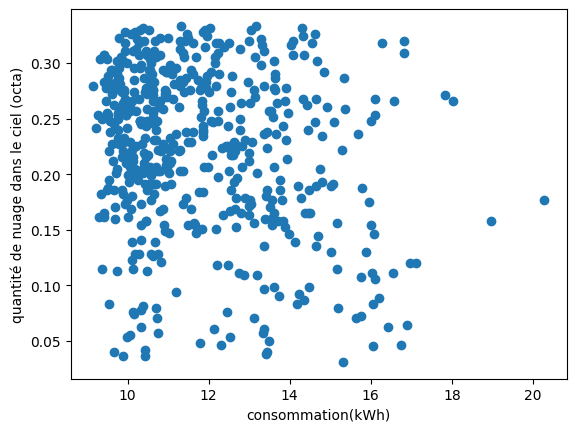

In [84]:
daily_data['clamt'] = daily_data['clamt']/24

plt.scatter(daily_data['mean'],daily_data['clamt'])
plt.xlabel('consommation(kWh)')
plt.ylabel('quantité de nuage dans le ciel (octa)')
plt.show()

In [16]:
tscv = TimeSeriesSplit(n_splits=5)
score = []
model = SVR()
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index[0]:train_index[-1]], X[test_index[0]:test_index[-1]]
     y_train, y_test = y[train_index[0]:train_index[-1]], y[test_index[0]:test_index[-1]]
     model.fit(X_train,y_train)
     y_new = model.predict(X_test)
     score2 = r2_score(y_test,y_new)
     score.append(score2)
     
print(score)

#model.fit(X_train, Y_train)
#y_pred = model.predict(X_test)
#print(y_pred)
#print(Y_test)
#print(model.score(X_test, Y_test))

TRAIN: [   0    1    2 ... 2069 2070 2071] TEST: [2072 2073 2074 ... 4141 4142 4143]
TRAIN: [   0    1    2 ... 4141 4142 4143] TEST: [4144 4145 4146 ... 6213 6214 6215]
TRAIN: [   0    1    2 ... 6213 6214 6215] TEST: [6216 6217 6218 ... 8285 8286 8287]
TRAIN: [   0    1    2 ... 8285 8286 8287] TEST: [ 8288  8289  8290 ... 10357 10358 10359]
TRAIN: [    0     1     2 ... 10357 10358 10359] TEST: [10360 10361 10362 ... 12429 12430 12431]
[0.525225828576543, 0.8437607654316954, 0.6033249832301861, 0.8546929524099036, 0.8706202313018012]


In [8]:
#Mean Absolute Percentage Error

mape = np.mean(np.abs((Y_test - y_pred)/Y_test))*100
mape

12.82235314617814

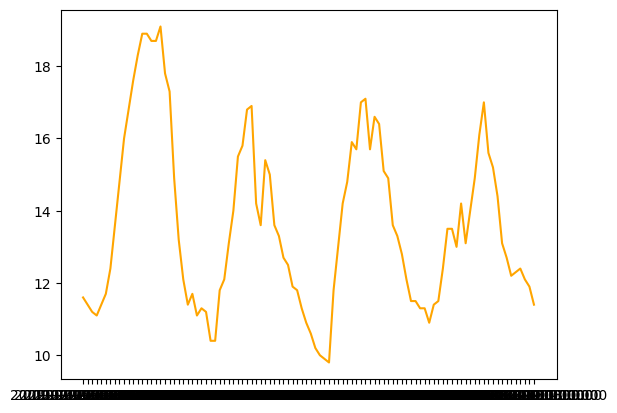

,date,mean,temp
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
25675,False,True,False
25676,False,True,False
25677,False,True,False
25678,False,True,False


                      date      mean  temp  ind  rain  ind.1  ind.2  wetb  \
0      2009-07-15 00:00:00  0.359623  11.6    3   0.0      0      0  11.4   
1      2009-07-15 01:00:00  0.246548  11.4    3   0.0      0      0  11.1   
2      2009-07-15 02:00:00  0.194699  11.2    3   0.1      0      0  10.9   
3      2009-07-15 03:00:00  0.180482  11.1    3   0.0      0      0  10.8   
4      2009-07-15 04:00:00  0.168851  11.4    3   0.0      0      0  11.1   
...                    ...       ...   ...  ...   ...    ...    ...   ...   
12427  2010-12-14 19:00:00  1.047525   2.0    3   0.0      0      0   1.1   
12428  2010-12-14 20:00:00  1.000873   1.0    3   0.0      0      0   0.4   
12429  2010-12-14 21:00:00  0.948643   0.1    3   0.0      0      1  -0.3   
12430  2010-12-14 22:00:00  0.837083  -0.1    3   0.0      1      1  -0.4   
12431  2010-12-14 23:00:00  0.699087   0.2    3   0.0      0      1  -0.2   

       dewpt  vappr  ...  ind.3  wdsp  ind.4  wddir  ww   w  sun    vis  cl

In [23]:
cons = pd.read_csv("df_vst_group8.csv",decimal='.')
cork = pd.read_csv("Corkstation_15072019_01022011.csv",nrows=12432,decimal='.')

donnees = pd.merge(cons,cork)


# Conversion de la colonne 'Heures' en type heure
donnees['date'] = pd.to_datetime(donnees['date'])

# Extraction de l'heure, des jours, jours de semaines dans des colonnes séparées
donnees['Heure'] = donnees['date'].dt.time.apply(lambda x: x.hour)
donnees['jour'] = donnees['date'].dt.date
donnees['weekday'] = donnees['date'].dt.weekday
donnees['month']= donnees['date'].dt.month


# Calcul de la température moyenne par jour
temperature_moyenne = donnees.groupby('jour')['temp'].mean().reset_index()
temperature_moyenne = temperature_moyenne.rename(columns={'temp': 'temp_moyenne'})
# Fusion des températures moyennes avec le dataframe d'origine
donnees_merged = pd.merge(donnees, temperature_moyenne, on='jour')

# Remplacement des valeurs de température par la température moyenne
donnees_merged['temp'] = donnees_merged['temp_moyenne']

# Suppression des colonnes intermédiaires
donnees_merged = donnees_merged.drop([ 'temp_moyenne'], axis=1)

donnees = donnees_merged.query('month > 8 or month < 4')

print(donnees)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,

In [28]:
import sklearn

# Drop rows with missing values
donnees.dropna(inplace=True)

# Create feature matrix and target vector
X = donnees[['Heure','temp','weekday']]

y = donnees['mean']

     
print(score)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)



[[ 0.  11.6  0. ]
 [ 1.  11.4  0. ]
 [ 2.  11.2  0. ]
 ...
 [21.   0.1  0. ]
 [22.  -0.1  0. ]
 [23.   0.2  0. ]]


In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
nb_neighbors = 9
model = KNeighborsRegressor(nb_neighbors)

# Split data into training and test sets
tscv = TimeSeriesSplit(n_splits=5)
score = []

for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index[0]:train_index[-1]], X[test_index[0]:test_index[-1]]
     y_train, y_test = y[train_index[0]:train_index[-1]], y[test_index[0]:test_index[-1]]
     model.fit(X_train,y_train)
     y_new = model.predict(X_test)
     score2 = r2_score(y_test,y_new)
     score.append(score2)
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)
print(Y_pred)
print(y_test)
print(model.score(X_test, y_test))

TRAIN: [   0    1    2 ... 2069 2070 2071] TEST: [2072 2073 2074 ... 4141 4142 4143]
TRAIN: [   0    1    2 ... 4141 4142 4143] TEST: [4144 4145 4146 ... 6213 6214 6215]
TRAIN: [   0    1    2 ... 6213 6214 6215] TEST: [6216 6217 6218 ... 8285 8286 8287]
TRAIN: [   0    1    2 ... 8285 8286 8287] TEST: [ 8288  8289  8290 ... 10357 10358 10359]
TRAIN: [    0     1     2 ... 10357 10358 10359] TEST: [10360 10361 10362 ... 12429 12430 12431]
[0.4754384  0.59124769 0.64205188 ... 0.96968497 0.96508414 0.86417959]
10360    0.598645
10361    0.683489
10362    0.697329
10363    0.717779
10364    0.724068
           ...   
12426    1.079941
12427    1.047525
12428    1.000873
12429    0.948643
12430    0.837083
Name: mean, Length: 2071, dtype: float64
0.8831218903285911


In [30]:
#Mean Absolute Percentage Error

mape = np.mean(np.abs((Y_test - Y_pred)/Y_test))*100
mape


0.03358168254988825
[0.42127901 0.65199219 0.42510763 ... 0.51599503 0.41925117 0.41925117]
[0.78384041 0.63294796 0.1803073  ... 0.97844652 0.62155008 0.23403735]


In [ ]:
x_pred = donnees.query('index < 123407 and index > 12335')
y_predicted = model.predict(x_pred[['Heure', 'temp', 'weekday']])
plt.plot(x_pred['date'], y_predicted)
plt.plot(x_pred['date'], x_pred['mean'], color='orange')